Solución Prueba técnica Santa Fe Energy, Jimena Uribe Giraldo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importar librerías necesarias para el análisis

**Preprocesamiento de los datos.**

In [5]:
#Lectura de la base de datos csv, tomando la primera fila como nombre de las columnas
df_gen=pd.read_csv("GeneraciónCauya2024.csv",sep=",",decimal=".",header=0)

In [6]:
df_gen.head()

,Unnamed: 0,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,362,Recurso,3AQP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,425.04,362.12,337.92,370.04,346.28,348.92,2024-11-27
1,676,Recurso,3AQP,341.88,341.00,338.80,340.56,333.52,330.88,332.64,...,351.56,328.68,348.04,318.56,332.64,340.12,337.48,333.52,330.00,2024-11-28
2,984,Recurso,3AQP,319.00,321.64,322.08,341.88,322.52,268.84,0.44,...,387.64,393.36,417.12,501.60,302.28,436.04,344.52,367.84,344.52,2024-11-29
3,1283,Recurso,3AQP,323.84,341.44,323.84,315.48,321.20,319.88,329.12,...,341.44,338.36,340.56,347.60,355.08,330.88,331.32,326.48,225.72,2024-11-30
4,1589,Recurso,3AQP,188.76,344.52,352.88,352.44,289.96,350.24,309.32,...,322.08,330.88,331.32,313.28,314.60,314.60,316.36,310.64,308.00,2024-12-01


In [7]:
#Parece que la base de datos tiene las columnas mal según la explicación de cada columna de la variable, por tanto
# vamos a corregir esto

df_gen.rename(columns={
    'Unnamed: 0': 'ID',  # Cambiar 'Unnamed: 0' a 'ID'
    'Id': 'Tipo_Agente'  # Cambiar 'Id' a 'Tipo_Agente'
}, inplace=True)



In [8]:
df_gen.head()

,ID,Tipo_Agente,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,362,Recurso,3AQP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,425.04,362.12,337.92,370.04,346.28,348.92,2024-11-27
1,676,Recurso,3AQP,341.88,341.00,338.80,340.56,333.52,330.88,332.64,...,351.56,328.68,348.04,318.56,332.64,340.12,337.48,333.52,330.00,2024-11-28
2,984,Recurso,3AQP,319.00,321.64,322.08,341.88,322.52,268.84,0.44,...,387.64,393.36,417.12,501.60,302.28,436.04,344.52,367.84,344.52,2024-11-29
3,1283,Recurso,3AQP,323.84,341.44,323.84,315.48,321.20,319.88,329.12,...,341.44,338.36,340.56,347.60,355.08,330.88,331.32,326.48,225.72,2024-11-30
4,1589,Recurso,3AQP,188.76,344.52,352.88,352.44,289.96,350.24,309.32,...,322.08,330.88,331.32,313.28,314.60,314.60,316.36,310.64,308.00,2024-12-01


In [9]:
df_gen.dtypes

,0
ID,int64
Tipo_Agente,object
Values_code,object
Values_Hour01,float64
Values_Hour02,float64
Values_Hour03,float64
Values_Hour04,float64
Values_Hour05,float64
Values_Hour06,float64
Values_Hour07,float64


In [10]:
#Dado que Date es tomado como object, lo cambiamos a datetime para facilitar después los análisis

df_gen['Date'] = pd.to_datetime(df_gen['Date'])


In [12]:
df_gen.shape

#En la base de datos hay 349 registros con 28 variables.

(349, 28)

In [13]:
#Como los NaN en la base se refiere a que no hubo generación de energía a esa hora,
#Se reemplaza por 0 para facilitar cálculos

hourly_columns = [col for col in df_gen.columns if col.startswith('Values_Hour')]
df_gen[hourly_columns] = df_gen[hourly_columns].fillna(0)

#Este código lo pedí a chat gpt para hacerlo más óptimo


In [14]:
df_gen.head() #Verificación de la medida anterior.

,ID,Tipo_Agente,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,362,Recurso,3AQP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,425.04,362.12,337.92,370.04,346.28,348.92,2024-11-27
1,676,Recurso,3AQP,341.88,341.00,338.80,340.56,333.52,330.88,332.64,...,351.56,328.68,348.04,318.56,332.64,340.12,337.48,333.52,330.00,2024-11-28
2,984,Recurso,3AQP,319.00,321.64,322.08,341.88,322.52,268.84,0.44,...,387.64,393.36,417.12,501.60,302.28,436.04,344.52,367.84,344.52,2024-11-29
3,1283,Recurso,3AQP,323.84,341.44,323.84,315.48,321.20,319.88,329.12,...,341.44,338.36,340.56,347.60,355.08,330.88,331.32,326.48,225.72,2024-11-30
4,1589,Recurso,3AQP,188.76,344.52,352.88,352.44,289.96,350.24,309.32,...,322.08,330.88,331.32,313.28,314.60,314.60,316.36,310.64,308.00,2024-12-01


**Análisis descriptivo**

***¿Cuál ha sido la generación diaria de los últimos 30 días?***

In [15]:
# Calcular la generación diaria sumando las columnas horarias
df_gen['Generacion_Diaria'] = df_gen[hourly_columns].sum(axis=1)

In [27]:
df_gen.Generacion_Diaria.head()

,Generacion_Diaria
0,2190.32
1,8256.16
2,9383.00
3,8025.60
4,7735.20


In [16]:
# Filtrar los últimos 30 días
ultimos30dias = df_gen[df_gen['Date'] >= df_gen['Date'].max() - pd.Timedelta(days=30)]

In [18]:
# Agrupar por fecha para sumar la generación diaria
Generación_Diaria= ultimos30dias[['Date', 'Generacion_Diaria']].groupby('Date').sum()

In [20]:
Generación_Diaria.head()

#Verificamos las medidas anteriormente realizadas

,Generacion_Diaria
Date,
2024-11-18,10383.12
2024-11-19,9807.60
2024-11-20,9245.72
2024-11-21,12329.68
2024-11-22,11557.92


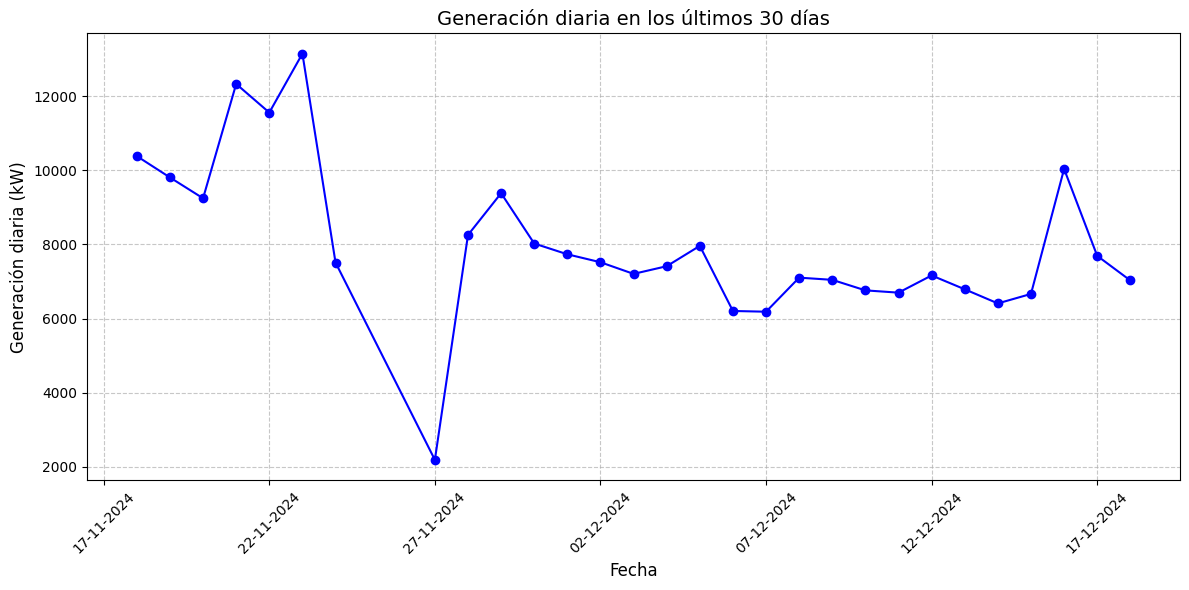

In [25]:
import matplotlib.dates as mdates

# Gráfico de generación diaria
plt.figure(figsize=(12, 6))
plt.plot(Generación_Diaria.index, Generación_Diaria['Generacion_Diaria'], 'o-b', label='Generación diaria')

# Etiquetas y formato
plt.title('Generación diaria en los últimos 30 días', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Generación diaria (kW)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Eje X ajustado para fechas cada 5 días
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.tight_layout()
plt.show()

#Código pedido a chat gpt para arreglar los ejes de manera rápida


Se evidencia que el 27-11-2024 fue el día de menor generación de energía. Mientras que el 23-11-2024 fue el día de mayor generación de energía.

Tendencias principales:

Volatilidad: La generación diaria presenta una alta variabilidad, lo que sugiere que diversos factores influyen en la producción de energía, como las condiciones climáticas, la demanda, y posiblemente, problemas técnicos o de mantenimiento.
Tendencia general a la baja: A pesar de la alta volatilidad, se aprecia una ligera tendencia descendente en la generación a medida que avanza el periodo analizado. Esto podría indicar un cambio estacional, un ajuste en la demanda, o algún otro factor sistémico que afecta la producción.
Picos y valles pronunciados: El día 23 de noviembre registra el pico más altos de generación, mientras que el 27 de noviembre se observa el mínimo. Estos picos y valles podrían estar relacionados con eventos específicos, como días de mayor demanda, condiciones climáticas extremas, festividades, entre otros.

***¿Cuánta energía en total ha generado cada mes durante todo el año?***

In [28]:
# Crear una nueva columna para el mes y año de cada fecha
df_gen['Month'] = df_gen['Date'].dt.to_period('M')

In [29]:
# Agrupar por mes y calcular la suma de la energía generada por mes
monthly_energy = df_gen.groupby('Month')['Generacion_Diaria'].sum()

In [53]:
# Mostrar la tabla con el total de energía generada por mes
monthly_energy_table = monthly_energy.reset_index()
monthly_energy_table.columns = ['Mes', 'Energía Total Generada (kWh)']
print(monthly_energy_table)

        Mes  Energía Total Generada (kWh)
0   2024-01                     143820.60
1   2024-02                     135273.16
2   2024-03                     104417.72
3   2024-04                     164043.88
4   2024-05                     374357.72
5   2024-06                     418286.88
6   2024-07                     547412.80
7   2024-08                     429779.24
8   2024-09                     260536.32
9   2024-10                     260335.68
10  2024-11                     259380.44
11  2024-12                     129634.56


In [31]:
# Calcular la suma de energía generada por cada hora
Energia_hora = df_gen[hourly_columns].sum()

# Identificar las horas con más y menos energía generada
max_energia_hora = Energia_hora.idxmax()
min_energia_hora = Energia_hora.idxmin()

# Mostrar las horas con más y menos energía generada
print(f'La hora con más energía generada es {max_energia_hora} con {Energia_hora[max_energia_hora ]:.2f} kWh.')
print(f'La hora con menos energía generada es {min_energia_hora} con {Energia_hora[min_energia_hora ]:.2f} kWh.')



La hora con más energía generada es Values_Hour14 con 139033.84 kWh.
La hora con menos energía generada es Values_Hour05 con 129248.24 kWh.


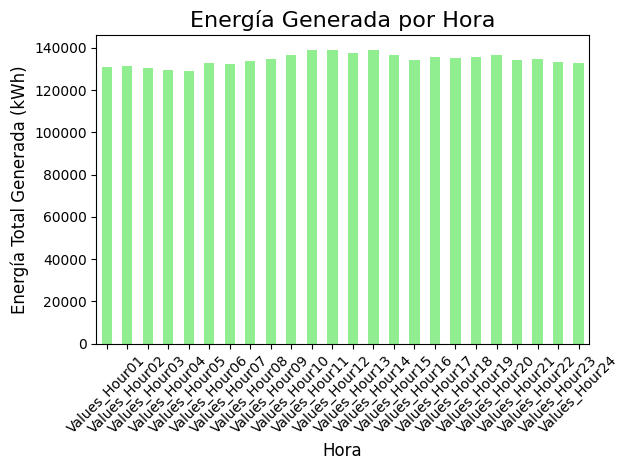

In [32]:
#Gráfico por Hora
Energia_hora.plot(kind='bar', color='lightgreen')
plt.title('Energía Generada por Hora', fontsize=16)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Energía Total Generada (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aunque se observa un leve aumento entre las 10am y la 1pm, realmente tienen un comportamiento similar.

La estabilidad en la generación podría indicar que el sistema de generación está funcionando de manera eficiente y confiable, la demanda por día se maneja de manera continua.

In [51]:
monthly_energy

,Generacion_Diaria
2024-01,143820.60
2024-02,135273.16
2024-03,104417.72
2024-04,164043.88
2024-05,374357.72
2024-06,418286.88
2024-07,547412.80
2024-08,429779.24
2024-09,260536.32
2024-10,260335.68


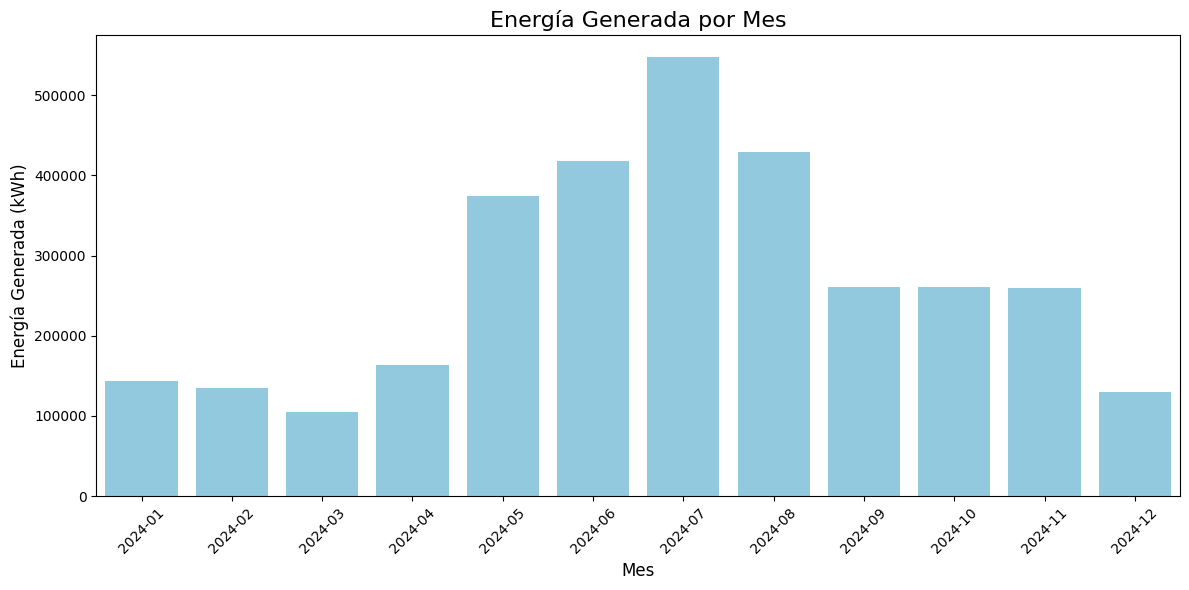

In [52]:
# Visualizar la energía generada por mes usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_energy.index.astype(str), y=monthly_energy, color='skyblue')
plt.title('Energía Generada por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Energía Generada (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Algunos meses tienen una generación muy superior a otros, lo que indica una gran variabilidad en la producción de energía a lo largo del año. La distribución parece encajar con una distribución Normal